### Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación

### Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2021
Búsqueda y Recomendación para Textos Legales

Mentor: Jorge E. Pérez Villella

# Práctico Análisis y Visualización

Integrantes:Carrion Nicolas y Delgado Gabriel

### Objetivos:
Normalizar el corpus generado en el práctico anterior, teniendo en cuenta los siguientes aspectos:

* tokenización,
* pasar a minúsculas,
* separar puntuación,
* stemming y lematización,
* eliminar stopwords (o no),
* eliminar las palabras con frecuencia menor a n.
* Analizar las palabras más frecuentes de todo el corpus, por fuero y de 5 documentos. Compararlo con el resultado obtenido en el ejercicio anterior. Se observa algún cambio significativo?

* Hacer una explicación con ejemplos tomando algunas palabras al azar entre lo que es stemming y lemmatizing para entender que nos da cada uno de estos procesos y cual es conveniente utilizar en cada caso.

Opcional:

* Investigar que es Segmentación y compararlo con Tokenización. Ejemplificar con un documento.
* Investigar NER (Named Entity Recognition - Reconocimiento de Entitades Nombradas). Buscar las Entidadas Nombradas mas frecuentes en todo el corpus y por fuero.
Fecha de Entrega: 4 de julio de 2021



In [47]:
import pandas as pd
import seaborn as sns
import os
import nltk
import matplotlib.pyplot as plt

In [48]:
def tokens2dataframe(tokens):
    freq = nltk.FreqDist(tokens)
    data = pd.DataFrame(freq.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
    return data
def graph_frequency(dataframe):
    plt.figure(figsize=(10,6))
    sns.barplot(x=dataframe[:15].Token, y=dataframe[:15].Frecuencia, color='skyblue')
    plt.xticks(rotation=90)
    sns.despine()

def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b)
    return s

In [49]:
dirname= "Corpus.txt"

f = open (dirname,'r', encoding="utf-8")
corpus=f.read()
f.close
corpus= corpus.lower()


Hay varios tokenizadores que NLTK brinda, de acuerdo a el objetivo especifico que tengamos (si queremos tokenizar puntos, oraciones, palabras, etc)
Nosotros utilizamos RegexpTokenizer que divide una cadena en subcadenas usando una expresión regular. Utilizamos este metodo debido a que observamos mejores resultados que con otros metodos como el WordTokenize y este metodo elimina los signos de puntuacion

In [50]:
#Se generan los tokens sin signos de puntuacion
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer(r'\w+')
tokens=tokenizer.tokenize(corpus)


Se eliminan las palabran con logitud menor a 3 caracteres por que creemos que no aportan informacion. Si muchas de estas palabras se eliminan mas adelante con los stopwords, quedan muchas palabras de 2 caracteres como 'fs', que probablemente se trate de un error ortografico

In [51]:
cant_letters=2
tokens=[token for token in tokens if len(token) > cant_letters]

Se normalizan los tokens, reemplazando los que tienen acento, por el mismo token sin acento, esto es para unificar ciertas palabras con errores de ortografia o no

In [52]:
tokens_normalize = [normalize(word) for word in tokens ]
tokens_normalize[:20]

['auto',
 '122',
 '547',
 '552',
 'cordoba',
 'veinticuatro',
 'septiembre',
 'dos',
 'mil',
 'dieciocho',
 'vistos',
 'estos',
 'autos',
 'caratulados',
 'control',
 'legalidad',
 'ley',
 '9944',
 'art',
 'expte']

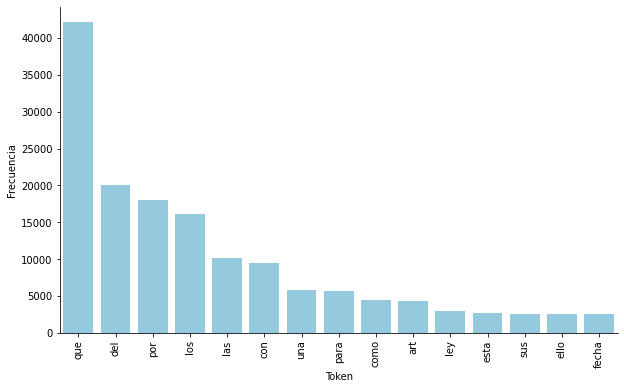

In [53]:
corpus_df = tokens2dataframe(tokens_normalize)
graph_frequency(corpus_df)

Stopword el nombre que reciben las palabras sin significado como artículos, pronombres, preposiciones, etc (como "el", "a", "una", "en") que un motor de búsqueda ha sido programado para ignorar, tanto al indexar entradas para buscarlas como al recuperarlas. como resultado de una consulta de búsqueda. 

Los stopwords aparecen por lo general en una lista de palabras, que se toma como referencia para eliminar el corpus. Nosotros utilizamos la lista de palabras que proporciona NLTK y ademas bajamos un txt de https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt que contiene mas stopwords

In [54]:
file_stopwords='stopwords.txt'
f = open (file_stopwords,'r', encoding="utf-8")
stopwords_list=f.read()
#stopwords_list.replace('\n', ' ')
stopwords_tokens=tokenizer.tokenize(stopwords_list)


In [55]:

stopwords_tokens=stopwords.words('spanish')
stopwords_tokens.extend(stopwords_tokens)

words = [token for token in tokens_normalize if token not in stopwords_tokens]
words[:20]

['auto',
 '122',
 '547',
 '552',
 'cordoba',
 'veinticuatro',
 'septiembre',
 'dos',
 'mil',
 'dieciocho',
 'vistos',
 'autos',
 'caratulados',
 'control',
 'legalidad',
 'ley',
 '9944',
 'art',
 'expte',
 'venidos']

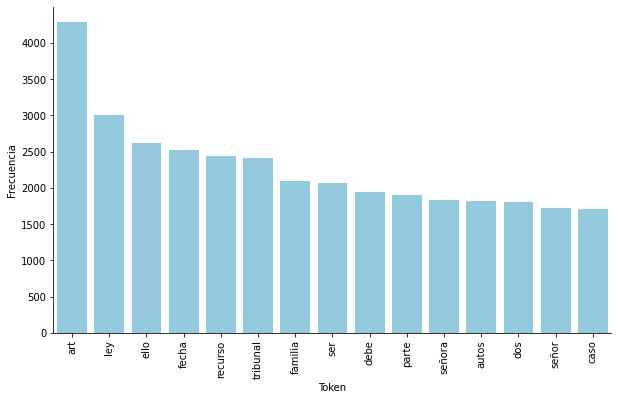

In [56]:
corpus_df_sw = tokens2dataframe(words)
graph_frequency(corpus_df_sw)

Se puede observar que la frecuencia de palabras cambia notablemente y ya no hay articulos ni signos de puntuacion que podian estar haciendo ruido. Tambien observamos que deja de cumplirse la Ley Zipf, exceptuando quizas las primeras 2 frecuencias de palabras

In [57]:
print("Lista de tokens del corpus original : ")
display(corpus_df[:20])
print("\nLista de tokens del corpus despues de eliminar las stopwords : ")
display(corpus_df_sw[:20])

Lista de tokens del corpus original : 


,Token,Frecuencia
39,que,42104
21,del,20037
98,por,18008
38,los,16075
71,las,10198
86,con,9433
422,una,5781
189,para,5747
100,como,4522
18,art,4285



Lista de tokens del corpus despues de eliminar las stopwords : 


,Token,Frecuencia
17,art,4285
15,ley,3002
111,ello,2614
52,fecha,2526
47,recurso,2444
147,tribunal,2407
158,familia,2096
199,ser,2064
242,debe,1947
513,parte,1906


El stemming consiste en quitar y reemplazar sufijos de la raíz de la palabra.Ej: La raíz de la palabra trabajando = > trabajo.

Los motores de búsqueda utilizan esta técnica al indexar páginas, puesto que muchas personas escriben versiones diferentes para la misma palabra y todas derivan de la palabra raíz.


Nosotros usamos el SnowballStemmer, por que si bien hay otros que funcionan mejor (PorterStemmer), estan optimizados para otros idiomas. El SnowballStemmer es el unico que encontramos, configurable en Español 


In [58]:
from nltk.stem import SnowballStemmer

spanish_stemmer = SnowballStemmer('spanish')

tokens_stemm=[spanish_stemmer.stem(word) for word in words]
tokens_stemm[:20]

['aut',
 '122',
 '547',
 '552',
 'cordob',
 'veinticuatr',
 'septiembr',
 'dos',
 'mil',
 'diecioch',
 'vist',
 'aut',
 'caratul',
 'control',
 'legal',
 'ley',
 '9944',
 'art',
 'expte',
 'ven']

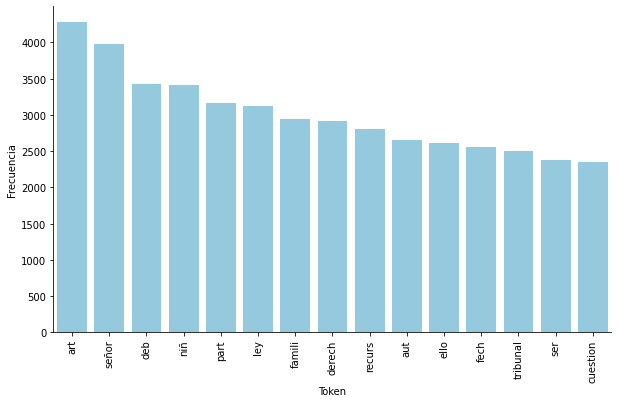

In [59]:
corpus_stemm = tokens2dataframe(tokens_stemm)
graph_frequency(corpus_stemm)

La lematización es un proceso lingüístico que consiste en, dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc), hallar el lema correspondiente. El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra. Es decir, el lema de una palabra es la palabra que nos encontraríamos como entrada en un diccionario tradicional.

El problema es que al menos hasta la fecha NLTK no tiene incorporada lemmatización para idioma español.

Por eso, utilizamos el WordNetLemmatizer, pero no vimos muy buenos resultados

In [60]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

tokens_lem=[lemmatizer.lemmatize(word) for word in words]
tokens_lem[:20]


['auto',
 '122',
 '547',
 '552',
 'cordoba',
 'veinticuatro',
 'septiembre',
 'do',
 'mil',
 'dieciocho',
 'vistos',
 'auto',
 'caratulados',
 'control',
 'legalidad',
 'ley',
 '9944',
 'art',
 'expte',
 'venidos']

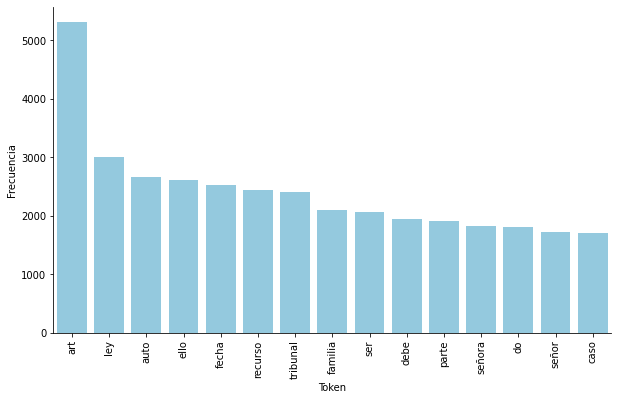

In [61]:
corpus_lem = tokens2dataframe(tokens_lem)
graph_frequency(corpus_lem)

In [62]:
print("Lista de tokens del corpus original : ")
display(corpus_df[:20])
print("\nLista de tokens del corpus tras eliminar las stopwords : ")
display(corpus_df_sw[:20])
# print("\nLista de tokens del corpus tras realizar el steamming : ")
# print(corpus_stemm[:20])
print("\nLista de tokens del corpus tras realizar la lemmatización : ")
display(corpus_lem[:20])

Lista de tokens del corpus original : 


,Token,Frecuencia
39,que,42104
21,del,20037
98,por,18008
38,los,16075
71,las,10198
86,con,9433
422,una,5781
189,para,5747
100,como,4522
18,art,4285



Lista de tokens del corpus tras eliminar las stopwords : 


,Token,Frecuencia
17,art,4285
15,ley,3002
111,ello,2614
52,fecha,2526
47,recurso,2444
147,tribunal,2407
158,familia,2096
199,ser,2064
242,debe,1947
513,parte,1906



Lista de tokens del corpus tras realizar la lemmatización : 


,Token,Frecuencia
16,art,5304
14,ley,3002
0,auto,2659
110,ello,2614
51,fecha,2526
46,recurso,2444
146,tribunal,2407
157,familia,2096
198,ser,2064
241,debe,1947


### Análisis del corpus total

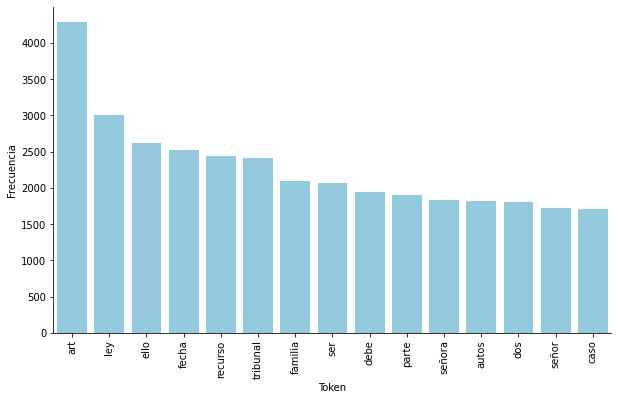

In [63]:
data=tokens2dataframe(words)
graph_frequency(data)

Aqui creamos una funcion para eliminar las palabras que tengan una frecuencia menor a n y pudimos observar que la mayor frecuencia de palabras se agrupan en un 1% de todo el conjunto total de palabras 

In [64]:
len(words)

610286

6742

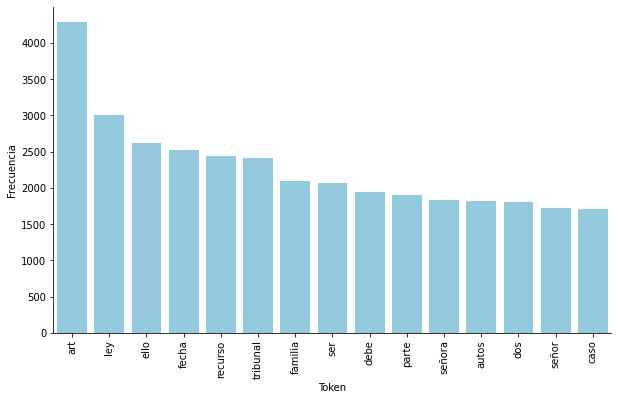

In [65]:
def delete_low_frecuency_words(dataframe, n):
    return dataframe[dataframe['Frecuencia']>n]
data= delete_low_frecuency_words(data,10)
graph_frequency(data)
len(data)

In [66]:
root=os.getcwd()
dirname=f'{root}\\Documentos'
def corpus_for_fuero(fuero):
    path_fuero=f'{dirname}\{fuero}'
    files = os.listdir(path_fuero)
    corpus=[]
    for file in files:
        path=f'{path_fuero}\{file}'
        f = open (path,'r', encoding="utf8")
        corpus.append(f.read())
    corpus=','. join(corpus)
    return corpus.lower(),files
def getListOfFiles(dirName, quantity=None):
    # create a list of file and sub directories 
    # names in the given directory
    files = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    if not quantity:
        for file in files:
            # Create full path
            fullPath = dirName + "\\" + file
            # If entry is a directory then get the list of files in this directory 
            if os.path.isdir(fullPath) and not quantity:
                allFiles = allFiles + getListOfFiles(fullPath)
            else:
                allFiles.append(fullPath)
    else:
        allFiles = allFiles + getListOfFiles(dirName)[:quantity]
    return allFiles


def create_corpus(file_list):
    corpus=[]
    for file in file_list:
        f = open (file,'r', encoding="utf8")
        corpus.append(f.read())
    corpus=','. join(corpus)
    return corpus

In [67]:
def clean_corpus(corpus):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens=tokenizer.tokenize(corpus)
    tokens_normalize = [normalize(word) for word in tokens ]
    words = [token for token in tokens_normalize if token not in stopwords_tokens]
    tokens_stemm=[spanish_stemmer.stem(word) for word in words]
    tokens_clean= [token for token in tokens_lem if len(token) > 1]
    data=tokens2dataframe(tokens_clean)
    graph_frequency(data)

### Fuero Familia

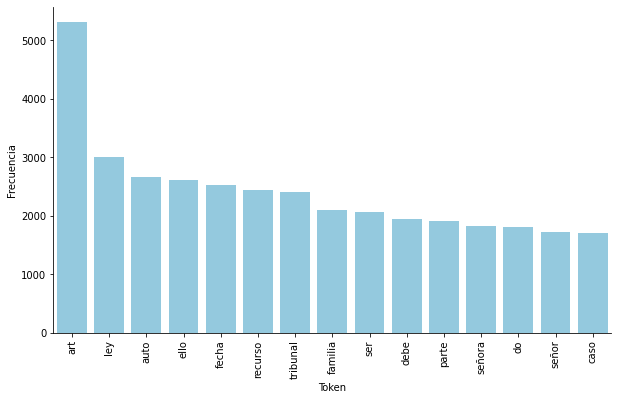

In [68]:
corpus_familia, files_familia=corpus_for_fuero('FAMILIA')
clean_corpus(corpus_familia)

***5 archivos del Fuero Familia***

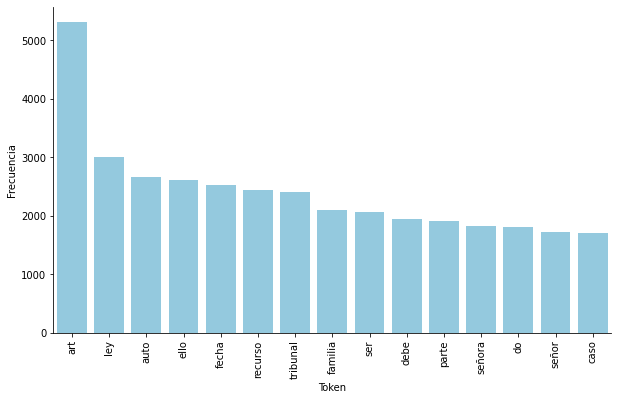

In [69]:
list_of_five_files_familia=getListOfFiles(dirname+ '\FAMILIA', 5)
corpus_five_familia=create_corpus(list_of_five_files_familia)
clean_corpus(corpus_five_familia)

### Fuero Laboral

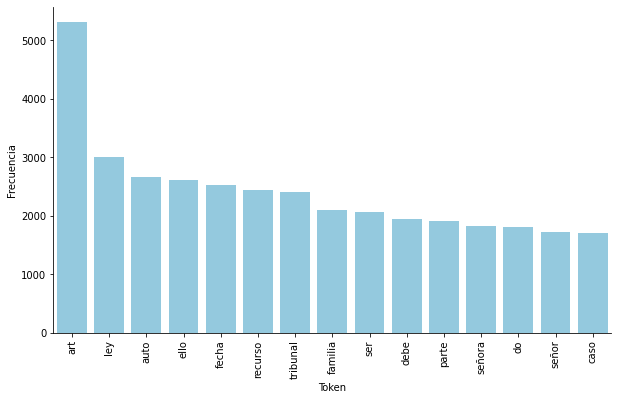

In [70]:
corpus_laboral,files_laboral=corpus_for_fuero('LABORAL')
clean_corpus(corpus_laboral)

***5 archivos del Fuero Laboral***

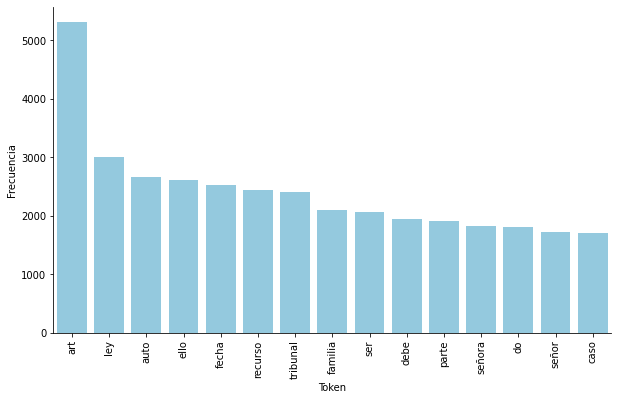

In [71]:
list_of_five_files_laboral=getListOfFiles(dirname+'\LABORAL', 5)
corpus_five_laboral=create_corpus(list_of_five_files_laboral)
clean_corpus(corpus_five_laboral)

### Fuero Menores

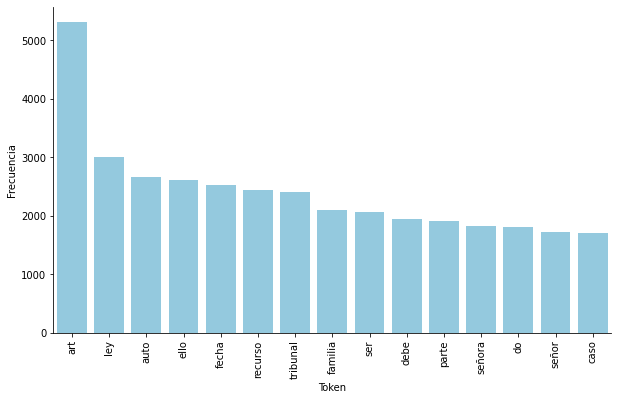

In [72]:
corpus_menores,files_menores=corpus_for_fuero('MENORES')
clean_corpus(corpus_menores)

***5 archivos del Fuero Menores***

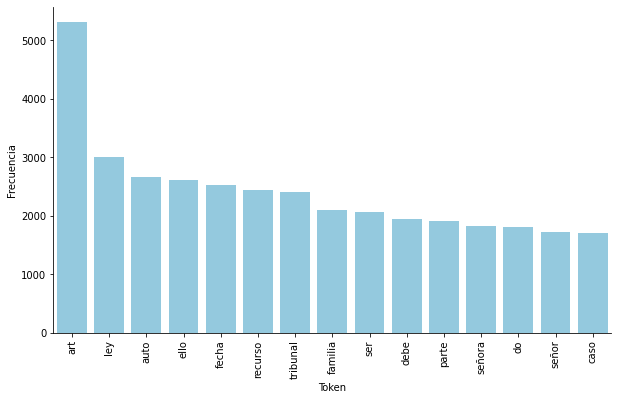

In [73]:
list_of_five_files_menores=getListOfFiles(dirname+ '\MENORES', 5)
corpus_five_menores=create_corpus(list_of_five_files_menores)
clean_corpus(corpus_five_menores)

### Fuero Penal

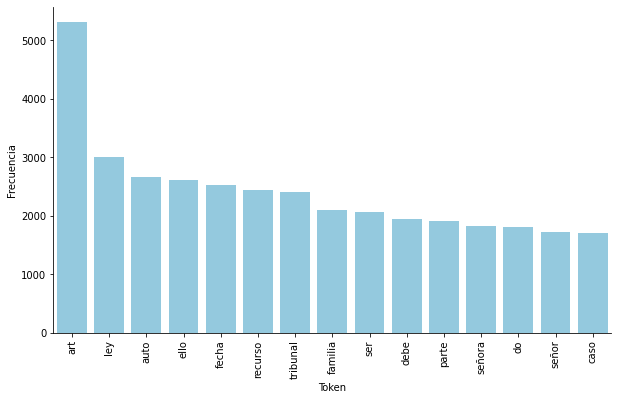

In [74]:
corpus_penal,files_penal=corpus_for_fuero('PENAL')
clean_corpus(corpus_penal)

***5 archivos del fuero penal***

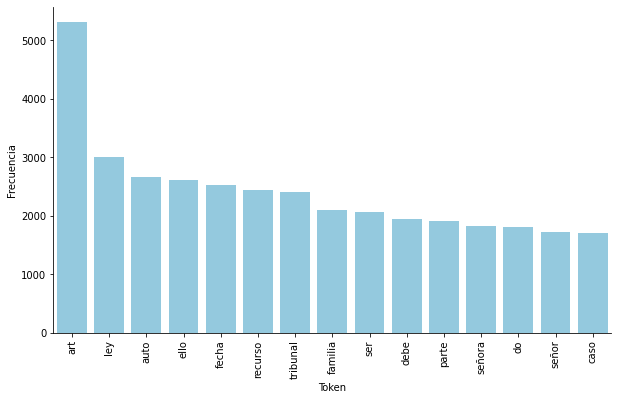

In [75]:
list_of_five_files_penal=getListOfFiles(dirname+ '\PENAL', 5)
corpus_five_penal=create_corpus(list_of_five_files_penal)
clean_corpus(corpus_five_penal)

***Stemming vs Lemmatizing***

In [76]:
import random
def lemmatizing(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]
    
def stemming(words):
    spanish_stemmer = SnowballStemmer('spanish')
    return [spanish_stemmer.stem(word) for word in words]
    
cant_words=20
words_comparison=random.sample(words, cant_words)
words_stemming=stemming(words_comparison)
words_lemmatizing=lemmatizing(words_comparison)

data_comparison=pd.DataFrame(words_comparison, columns=['words'])
data_comparison['Stemming']=words_stemming
data_comparison['Lemmatizing']=words_lemmatizing
data_comparison

,words,Stemming,Lemmatizing
0,abreviado,abrevi,abreviado
1,contesta,contest,contesta
2,cpcc,cpcc,cpcc
3,presente,present,presente
4,certeza,certez,certeza
5,matricula,matricul,matricula
6,art,art,art
7,bien,bien,bien
8,vocal,vocal,vocal
9,realizacion,realizacion,realizacion


Los algoritmos de stemming funcionan cortando el final o el comienzo de la palabra, teniendo en cuenta una lista de prefijos y sufijos comunes que se pueden encontrar en una palabra flexionada. Este corte indiscriminado puede tener éxito en algunas ocasiones, pero no siempre, por eso afirmamos que este enfoque presenta algunas limitaciones.


La lematización considera el contexto y convierte la palabra a su forma básica significativa, que se llama Lema. Para extraer el lema adecuado, es necesario fijarse en el análisis morfológico de cada palabra.


La lemmatizacion es mas lenta que la stemmatizacion. En los ejemplos se puede ver que ninguna es muy optima, por un lado por que en la stemmatizacion se queda con la raiz de las palabras y en el castellano no parece funcionar muy bien, por otro lado la lemmatizacion no hace practicamente cambios, deducimos que tambien se debe a que no esta optimizado para el castellano y por eso no encuentra variables morfologicas de cada palabra

In [77]:
#Ejemplo de lematizacion que no funciona para el español

español = ['remataria', 'remate', 'rematando', 'rematasemos']

lems = [lemmatizer.lemmatize(word) for word in español]
lems

['remataria', 'remate', 'rematando', 'rematasemos']

***OPCIONAL***

***Tokenización:***

La tokenización es el proceso de dividir un documento de texto en sus distintos componentes, descartando los espacios en blancos y saltos de línea. Un token es una cadena de caracteres (palabra o un signo de puntuación) con algún significado en el contexto de un texto. Por ejemplo, el texto “El niño corre” tiene tres tokens: {'El', 'niño', 'corre'}. Aunque la tokenización puede resultar trivial, no lo es si se considera que existen caracteres que algunas veces pueden ser parte de un token y otras veces pueden resultar ser separadores de tokens. Por ejemplo, el carácter punto puede ser parte de una abreviatura o sigla, pero también puede resultar ser separador de oraciones.

***Segmentación:***

Consiste en separar el texto en fragmentos que puedan tratarse de forma independiente. La forma más usual de segmentación es dividir el texto en párrafos u oraciones.

In [78]:
from nltk.tokenize import sent_tokenize
tokenizer = nltk.sent_tokenize(corpus)
random.sample(tokenizer,5)

['abierto el acto por la\xa0señora presidente se informa que las cuestiones a resolver son las\n\nsiguientes:  \n\n1°) ¿ha sido indebidamente fundado el enunciado relativo a la participación de la imputada\n\nexpediente nro.',
 'es que este tribunal de alzada no puede desconocer, que si bien parar asistir al hijo en edad escolar y con mayor interacción social, el importe que surge del porcentaje fijado es necesario para afrontar las necesidades referidas a alimentación, vestimenta, educación y esparcimiento (art.',
 '2710546   -   4 / \n\n21\x0cque tal valoración es errónea, ya que el nombrado manifestó expresamente “…\n\nque quiere dejar la droga, que se le aplique un tratamiento psicológico para\n\nconcluir con los problemas que lo llevan a la drogadicción y a esta vida en el\n\ndelito …” (f. 358 vta.).',
 '288 se ordena correr el traslado a la señora asesora de familia interviniente, respondiendo a fs.',
 '716/717) señalan que azcurra ha logrado un posicionamiento más\n\nactivo  en 

***Reconocimiento de entidades nombradas:***

El reconocimiento de entidades nombradas, tambien conocido como extraccion de entidades, es una
tarea de extraccion de informacion que busca localizar y clasificar en
categorıas predefinidas como personas, organizaciones, lugares, expresiones de tiempo y cantidades, las entidades nombradas encontradas
en un texto.

El reconocimiento de entidades nombradas a menudo se divide
conceptualmente en dos problemas distintos: deteccion de nombres,
y clasificacion de los nombres segun el tipo de entidad al que hacen
referencia.

Una tercera fase que se desprende del reconocimiento y clasificacion de entidades nombradas se conoce como anotacion semantica
donde se anota una entidad con una referencia a algun link de una base de conocimiento que contenga una
definicion semantica de la entidad

### Conclusion:

A lo largo del trabajo se aplicaron ciertas tecnicas de curacion y limpieza de datos que nos permitio eliminar gran cantidad de ruido que tenia el corpus original. Utilizamos los metodos que nos proveia NLTK y con eso solo, no alcanza, si no que hay que aplicar algunas transformaciones aparte. 
* Con respecto a los metodos de tokenizacion que brinda la libreria, algunos funcionan mejor que otros para determinados objetivos, pero el que terminamos utilizando, fue el que vimos que eliminaba mejor los signos de puntuacion. 
* En el caso de los stopwords, la lista de palabras a eliminar nos parecio insuficiente asi que tuvimos que descargar una lista de un repositorio publico y recien ahi observamos una mejor limpieza.
* Otra cosa que creemos que funciono muy bien, fue la eliminacion de palabras con una longitud menor a 3, que por lo general eran palabras que no estaban incluidas en los stopwords u errores de ortografia.
* Con respecto a la lemmatizacion y el stemming, nosotros observamos mejores resultados con el stemming debido a que NLTK no posee un metodo de lemmatizacion optimizados para el español y si posee para el stemming. 
* Cuando realizamos el analisis por fuero, no aplicamos la lemmatizacion por lo mencionado anteriomente entonces no creiamos que fuera a aportar resultados valiosos.

Una vez aplicados todos estos cambios, pudimos ver tanto en el corpus completo como en cada fuero, que ya no hay tanto ruido (se deja de cumplir la ley de Zipf para mas de 2 palabras) y se observan palabras mas vinculadas con cada fuero, por ejemplo en el fuero familia, 2 de las palabras mas frecuentes son "niño" y "alimentaria" lo cual tiene sentido. 
Lo que no se realizo pero seria interesante, es el tratamiento de los numeros. Nosotros creemos que estos pueden ser relevantes en determinados contextos y en otros, no deberian aportar informacion. 
Lo mismo pasa con las fechas, seria interesante ver, cuales estan relacionadas con leyes o articulos para poder determinar si los mismos son obsoletos o no.
